In [2]:
try:
    num = int(input("請輸入想顯示的圖片編號（1-20）："))
    if num < 0 or num > 20 : 
        raise ValueError 
except ValueError:
    print("輸入的不是一個有效的數字")    

<class 'numpy.ndarray'>


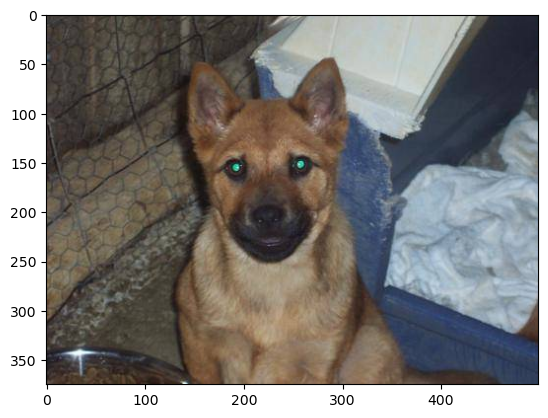

In [3]:
import cv2 as cv 
from matplotlib import pyplot as plt
import os 
import numpy as np 

path = os.getcwd() + '/HW1 image/test/pic' + str(num) + '.jpg'
# print(path)
pivot_image = cv.imread(path,cv.IMREAD_COLOR)
print(type(pivot_image))
#print(pivot_image , type(pivot_image))
plt.imshow(pivot_image[:,:,[2,1,0]])
plt.show()

pivot_image = cv.resize(pivot_image,(64,64))

In [4]:

path = os.getcwd() + '/HW1 image/reference'
pics_str = list(os.walk(path))
print(pics_str)
pics = pics_str[2][2]
comp_list = []
comp_dict = {'dog': [] , 'cat':[] } 
for x in pics :
    comp_dict['dog'].append((cv.resize( cv.imread(path + '/dogs/' + x ),(64,64)),'/dogs/' + x))

pics = pics_str[1][2] 
for x in pics :
    comp_dict['cat'].append((cv.resize( cv.imread(path + '/cats/' + x ),(64,64)),'/cats/' + x))

res = [(abs(y[0]-pivot_image).sum()) for x in comp_dict.values() for y in x ]


[('d:\\Desktop\\ML_HW/HW1 image/reference', ['cats', 'dogs'], []), ('d:\\Desktop\\ML_HW/HW1 image/reference\\cats', [], ['cat.1.jpg', 'cat.10.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.2.jpg', 'cat.20.jpg', 'cat.21.jpg', 'cat.22.jpg', 'cat.23.jpg', 'cat.24.jpg', 'cat.25.jpg', 'cat.26.jpg', 'cat.27.jpg', 'cat.28.jpg', 'cat.29.jpg', 'cat.3.jpg', 'cat.30.jpg', 'cat.31.jpg', 'cat.32.jpg', 'cat.33.jpg', 'cat.34.jpg', 'cat.35.jpg', 'cat.36.jpg', 'cat.37.jpg', 'cat.38.jpg', 'cat.39.jpg', 'cat.4.jpg', 'cat.40.jpg', 'cat.41.jpg', 'cat.42.jpg', 'cat.43.jpg', 'cat.44.jpg', 'cat.45.jpg', 'cat.46.jpg', 'cat.47.jpg', 'cat.48.jpg', 'cat.49.jpg', 'cat.5.jpg', 'cat.50.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg']), ('d:\\Desktop\\ML_HW/HW1 image/reference\\dogs', [], ['dog.1.jpg', 'dog.10.jpg', 'dog.11.jpg', 'dog.12.jpg', 'dog.13.jpg', 'dog.14.jpg', 'dog.15.jpg', 'dog.16.jpg', 'dog.17.jpg', 'dog.18

(k=3)
相似圖片是狗的有1張圖片
相似圖片是貓的有2張圖片
此圖判斷為貓


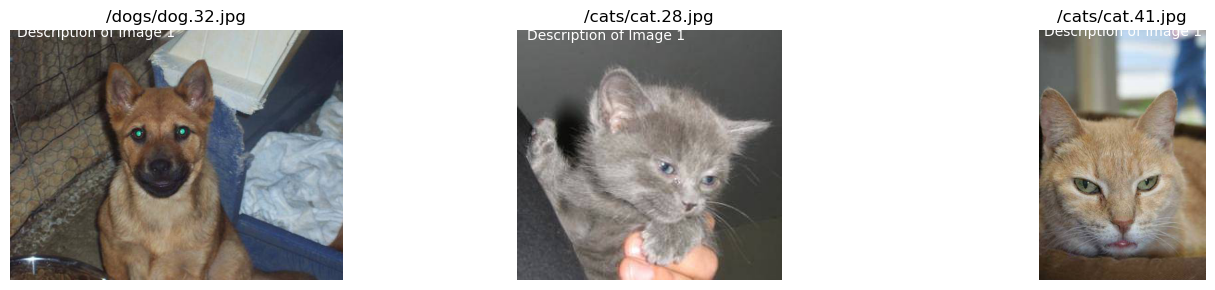

(k=5)
相似圖片是狗的有3張圖片
相似圖片是貓的有2張圖片
此圖判斷為狗


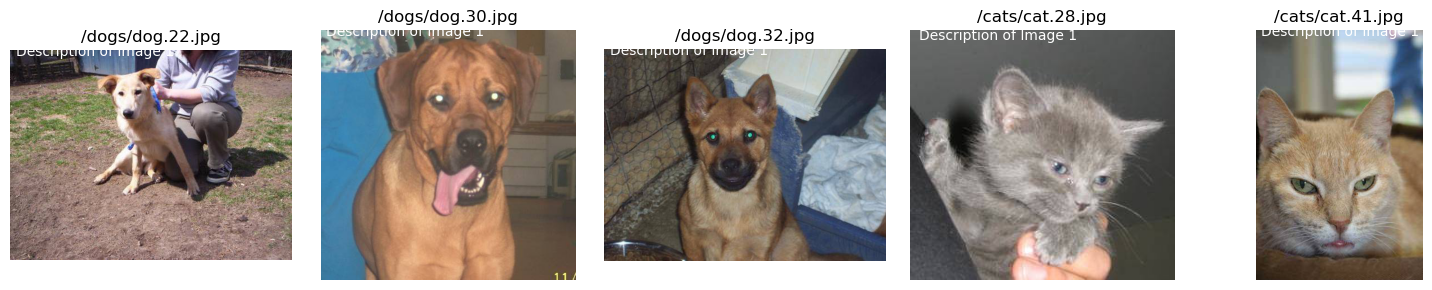

(k=7)
相似圖片是狗的有4張圖片
相似圖片是貓的有3張圖片
此圖判斷為狗


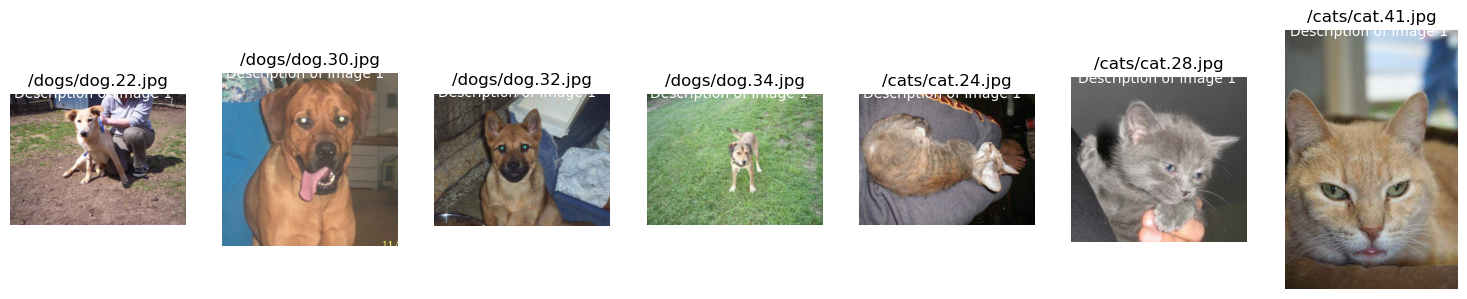

(k=9)
相似圖片是狗的有6張圖片
相似圖片是貓的有3張圖片
此圖判斷為狗


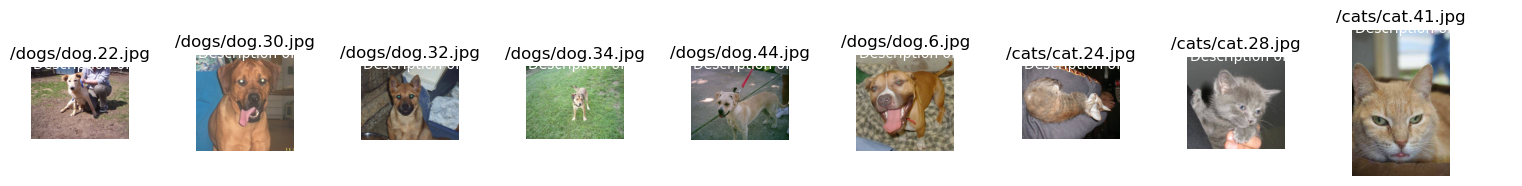

In [5]:
for k in range(3,10,2) :
    sorted_list = sorted(res)[:k]
    min_indices = [i for i, x in enumerate(res) if x in sorted_list]
    temp = len([x for x in min_indices if x <50 ])
    print('(k=%d)'%k)
    print('相似圖片是狗的有' , temp , '張圖片' , sep = '')
    print('相似圖片是貓的有' , k-temp , '張圖片' , sep = '')
    if temp > k//2 :
        print('此圖判斷為狗')
    else :
        print('此圖判斷為貓')

    #plt.figure(figsize=(15,3))
    fig, axes = plt.subplots(1,k, figsize=(15, 3))
    for i , x in enumerate(min_indices) :
        if x < 50 :
            str_ = 'dog'
            loop_path = path + '/dogs/' 
        else : 
            str_ = 'cat'
            loop_path = path + '/cats/' 
            
        axes[i].imshow(plt.imread(path + comp_dict[str_][x%50][1]))
        axes[i].axis('off')
        axes[i].set_title(comp_dict[str_][x%50][1])
        axes[i].text(10, 10, 'Description of Image 1', color='white', fontsize=10)
    plt.tight_layout()  # 调整子图之间的间距
    plt.show() 

#### 不同K值對判斷貓狗的準確度的影響

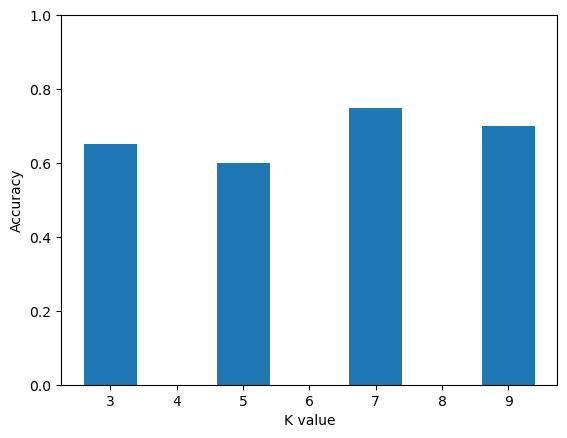

In [54]:
label = [0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,1,0,0] #貓0 狗1 From pic1-pic20
label = [0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,1,0,0]

accuracy = [0,0,0,0,0,0,0,0,0,0]

for num in range(1,21): 
    path = os.getcwd() + '/HW1 image/test/pic' + str(num) + '.jpg'
    pivot_image = (cv.resize(cv.imread(path,cv.IMREAD_COLOR),(64,64)))
    
    res = [(abs(y[0]-pivot_image).sum()) for x in comp_dict.values() for y in x ]

    for k in range(3,10,2) :
        sorted_list = sorted(res)[:k]
        min_indices = [i for i, x in enumerate(res) if x in sorted_list]
        temp = len([x for x in min_indices if x <50 ]) # <50 dog
        if label[num] == 0 and (k-temp)/k > 0.5:
            accuracy[k] += 1 
        elif label[num] == 1 and (temp)/k > 0.5 : 
            accuracy[k] += 1 

k_value=[3,5,7,9]
acc=[]
acc.append(accuracy[3]/20)
acc.append(accuracy[5]/20)
acc.append(accuracy[7]/20)
acc.append(accuracy[9]/20)

plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('K value')
plt.bar(k_value,acc)
plt.show()


####  此方法判斷貓狗所遇到的問題
>  - 準確度都有超過一半，但若想達到較高準確度較難
>  - 圖片解析度不同 需resize到同一大小 損失的pixel數可能會導致判別錯誤
>  - k 值的不同影響較少 判別準確度比較看運氣

In [9]:
import pandas as pd

def check_value(Data,index,value):
    return Data.iloc[index,1] == value

df = pd.read_csv('HW1_data.csv')
name=[]
for i in df['0']:
    if i in name:
        continue
    else:
        name.append(i)

sex,age,hr,height,weight,bp=[],[],[],[],[],[]

for i,j in enumerate(name):
    temp = df[df['0']==j]    
    for k in range(temp.shape[0]):
        if check_value(temp,k,'Sex'):
            sex.append(temp.iloc[k,2])
        elif check_value(temp,k,'Age'):
            age.append(temp.iloc[k,2])
        elif check_value(temp,k,'HR'):
            hr.append(temp.iloc[k,2])
        elif check_value(temp,k,'Height'):
            height.append(temp.iloc[k,2])
        elif check_value(temp,k,'Weight'):
            weight.append(temp.iloc[k,2])
        elif check_value(temp,k,'BP'):
            bp.append(temp.iloc[k,2])
    if len(sex) == i:
        sex.append(None)
    if len(age) == i:
        age.append(None)
    if len(hr) == i:
        hr.append(None)
    if len(height) == i:
        height.append(None)
    if len(weight) == i:
        weight.append(None)
    if len(bp) == i:
        bp.append(None)

dict = {'Name':name,'Sex':sex,'Age':age,'HR':hr,'Height':height,'Weight':weight,'BP':bp}
df_new = pd.DataFrame(dict)
df_new

,Name,Sex,Age,HR,Height,Weight,BP
0,Daniel,M,37,80,165,72,131
1,Avery,F,66,72,159,54,121
2,Joseph,M,42,None,168,70,110
3,Jackson,M,46,81,170,64,97
4,Nora,F,48,82,153,59,93
5,Aiden,M,38,93,166,69,136
6,Evelyn,F,60,67,168,60,106
7,Zoey,F,37,79,None,None,112
8,Matthew,M,69,85,166,70,128
9,Layla,F,12,87,156,47,142


In [10]:
df_new.fillna(-1,inplace=False)
age_avg, hr_avg, height_avg, weight_avg, bp_avg=0,0,0,0,0
age_nan, hr_nan, height_nan, weight_nan, bp_nan=0,0,0,0,0

for i in range(df_new.shape[0]):
    age_avg += int(df_new.fillna(-1,inplace=False).loc[i,'Age'])
    if int(df_new.fillna(-1,inplace=False).loc[i,'Age']) == -1:
        age_nan +=1

    hr_avg += int(df_new.fillna(-1,inplace=False).loc[i,'HR'])
    if int(df_new.fillna(-1,inplace=False).loc[i,'HR']) == -1:
        hr_nan +=1

    height_avg += int(df_new.fillna(-1,inplace=False).loc[i,'Height'])
    if int(df_new.fillna(-1,inplace=False).loc[i,'Height']) == -1:
        height_nan +=1

    weight_avg += int(df_new.fillna(-1,inplace=False).loc[i,'Weight'])
    if int(df_new.fillna(-1,inplace=False).loc[i,'Weight']) == -1:
        weight_nan +=1
    
    bp_avg += int(df_new.fillna(-1,inplace=False).loc[i,'BP'])
    if int(df_new.fillna(-1,inplace=False).loc[i,'BP']) == -1:
        bp_nan +=1

age_avg /= (df_new.shape[0] - age_nan)
hr_avg /= (df_new.shape[0] - hr_nan)
height_avg /= (df_new.shape[0] - height_nan)
weight_avg /= (df_new.shape[0] - weight_nan)
bp_avg /= (df_new.shape[0] - bp_nan)
# print(age_avg, hr_avg, height_avg, weight_avg, bp_avg)
# print(age_nan, hr_nan, height_nan, weight_nan, bp_nan)
df_new_withavg = df_new.copy()
df_new_withavg.loc['Avg'] = ['Average',None, age_avg, hr_avg, height_avg, weight_avg, bp_avg] 
df_new_withavg


,Name,Sex,Age,HR,Height,Weight,BP
0,Daniel,M,37,80,165,72,131
1,Avery,F,66,72,159,54,121
2,Joseph,M,42,None,168,70,110
3,Jackson,M,46,81,170,64,97
4,Nora,F,48,82,153,59,93
5,Aiden,M,38,93,166,69,136
6,Evelyn,F,60,67,168,60,106
7,Zoey,F,37,79,None,None,112
8,Matthew,M,69,85,166,70,128
9,Layla,F,12,87,156,47,142


In [11]:
age_max, hr_max, height_max, weight_max, bp_max = [],[],[],[],[]
temp = df_new[df_new['Age']==df_new.sort_values(['Age'],ascending=False).iloc[0,2]]
for i in range(temp.shape[0]):
    age_max.append(temp.iloc[i,0])


temp = df_new[df_new['HR']==df_new.sort_values(['HR'],ascending=False).iloc[0,3]]
for i in range(temp.shape[0]):
    hr_max.append(temp.iloc[i,0])

temp = df_new[df_new['Height']==df_new.sort_values(['Height'],ascending=False).iloc[0,4]]
for i in range(temp.shape[0]):
    height_max.append(temp.iloc[i,0])

temp = df_new[df_new['Weight']==df_new.sort_values(['Weight'],ascending=False).iloc[0,5]]
for i in range(temp.shape[0]):
    weight_max.append(temp.iloc[i,0])

temp = df_new[df_new['BP']==df_new.sort_values(['BP'],ascending=False).iloc[0,6]]
for i in range(temp.shape[0]):
    bp_max.append(temp.iloc[i,0])

print("Age 最大的人是",[i for i in age_max])
print("HR 最大的人是",[i for i in hr_max])
print("Height 最大的人是",[i for i in height_max])
print("Weight 最大的人是",[i for i in weight_max])
print("BP 最大的人是",[i for i in bp_max])
#print([df_new[df_new['Weight']==df_new.sort_values(['Weight'],ascending=False).iloc[0,2]]['Name'].iloc([i,0]) for i in range(3)])
#df_new.sort_values(['BP'],ascending=False)

Age 最大的人是 ['Madison']
HR 最大的人是 ['Liam']
Height 最大的人是 ['Mason']
Weight 最大的人是 ['Mason', 'Jacob', 'Logan']
BP 最大的人是 ['Emily', 'Elizabeth']


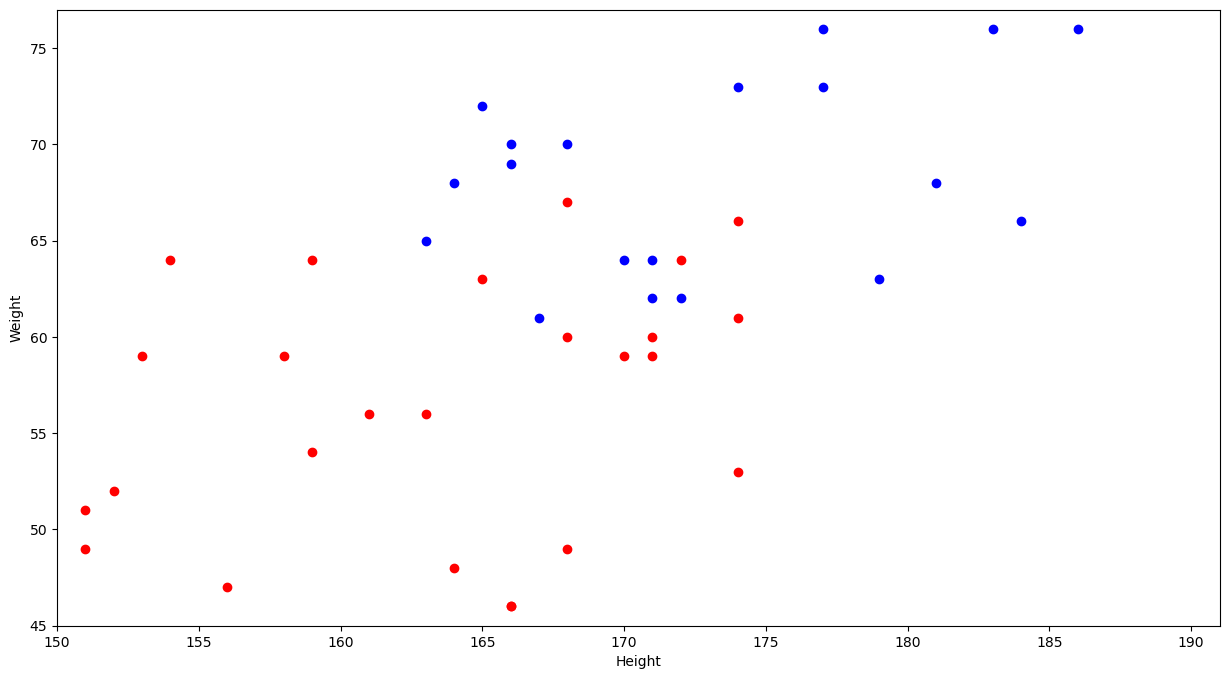

In [12]:
import matplotlib.pyplot as plt

x_height_M, x_height_F, y_weight_M, y_weight_F=[],[],[],[]

for i in range(len(sex)):
    if sex[i] == None or height[i] == None or weight[i] == None:
        continue
    if sex[i] == 'M':
        x_height_M.append(int(height[i]))
        y_weight_M.append(int(weight[i]))
    else:
        x_height_F.append(int(height[i]))
        y_weight_F.append(int(weight[i]))

plt.figure(figsize=(15,8))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(150,191)
plt.ylim(45,77)
plt.scatter(x_height_M,y_weight_M,color='b')
plt.scatter(x_height_F,y_weight_F,color='r')
plt.show()

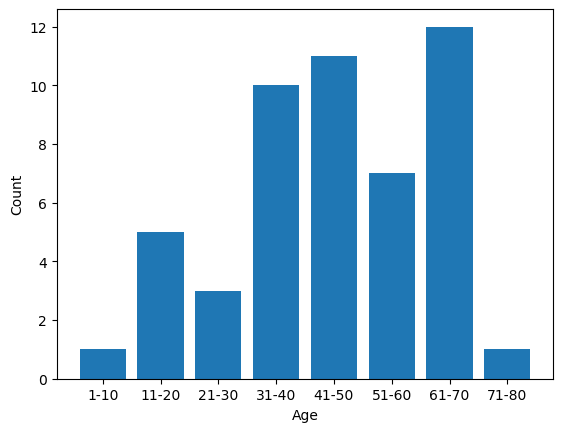

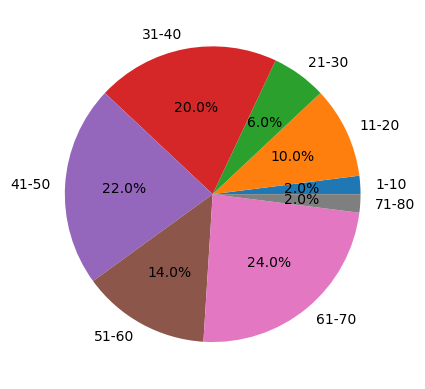

In [13]:
x_age=['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
count=[0,0,0,0,0,0,0,0]

for i in range(len(age)):
    count[(int(age[i])+9)//10-1]+=1
plt.ylabel('Count')
plt.xlabel('Age')
plt.bar(x_age,count)
plt.show()

plt.pie(count,labels=x_age,autopct='%.1f%%')
plt.show()

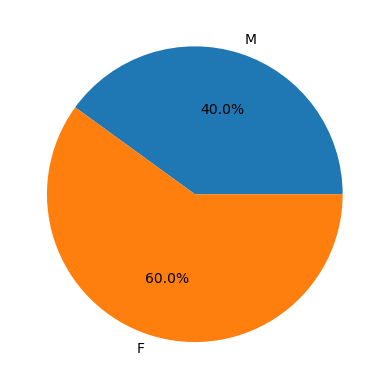

In [14]:
x_sex=['M','F']
sex_count=[0,0]
for i in range(len(sex)):
    if sex[i] == 'M':
        sex_count[0]+=1
    else:
        sex_count[1]+=1

plt.pie(sex_count,labels=x_sex,autopct='%.1f%%')
plt.show()